In [4]:
import numpy as np
import pandas as pd
from constants import *
from utils import shift_axis, weibull_noise, sample_scale
from collections import defaultdict
from pandas.tseries.frequencies import to_offset
from series_config import ComponentScale, SeriesConfig, ComponentNoise
import matplotlib.pyplot as plt

In [5]:
def make_series_trend(series: SeriesConfig, dates: pd.DatetimeIndex):
    """
    Function to generate the trend(t) component of synthetic series
    :param series: series config for generating trend of synthetic series
    :param dates: dates for which data is present
    :return: trend component of synthetic series
    """
    values = np.full_like(dates, series.scale.base, dtype=np.float32)
    print(values)

    days = (dates - dates[0]).days
    if series.scale.linear is not None:
        linear_trend = shift_axis(days, series.offset.linear) * series.scale.linear
        values += linear_trend
        print(linear_trend, values)
    if series.scale.exp is not None:
        exp_trend = np.power(series.scale.exp, shift_axis(days, series.offset.exp))
        values *= exp_trend
        print(exp_trend, values)

    return values, linear_trend, exp_trend

In [3]:
from generate_series_components import make_series_seasonal

def make_series(
    series: SeriesConfig,
    freq: pd.DateOffset,
    periods: int,
    start: pd.Timestamp
):
    """
    make series of the following form
    series(t) = trend(t) * seasonal(t)
    """
    start = freq.rollback(start)
    dates = pd.date_range(start=start, periods=periods, freq=freq)
    scaled_noise_term = 0

    values_trend, values_linear, values_exp = make_series_trend(series, dates)
    values_seasonal = make_series_seasonal(series, dates)

    values = values_trend * values_seasonal['seasonal']

    weibull_noise_term = weibull_noise(
        k=series.noise_config.k,
        median=series.noise_config.median,
        length=len(values)
    )

    # approximating estimated value from median
    noise_expected_val = series.noise_config.median

    # expected value of this term is 0
    # for no noise, scale is set to 0
    scaled_noise_term = series.noise_config.scale * (weibull_noise_term - noise_expected_val)

    dataframe_data = {
        **values_seasonal,
        'values': values,
        'noise': 1 + scaled_noise_term,
        'dates': dates
    }

    return values_trend, values_linear, values_exp, values_seasonal, 1 + scaled_noise_term, dates, values

In [ ]:
import plotnine
from plotnine import *
series_theme = theme_minimal() + plotnine.themes.theme(
    legend_direction='horizontal',
    legend_position=[.5, 0.1],
    legend_title=element_blank(),
    legend_box_spacing=.4,
    axis_text_x=element_text(rotation=25, hjust=1, size=13),
    figure_size=(4, 5),
    text=element_text(size=18),
)

%matplotlib inline


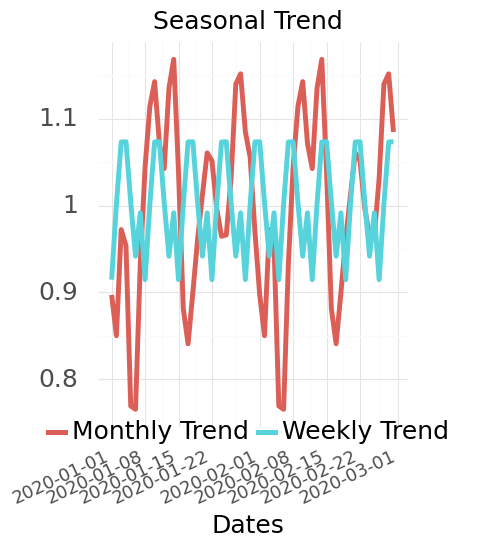

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/1bc1ca29-8e67-4d49-980f-c9382b96e904_seasonal.png


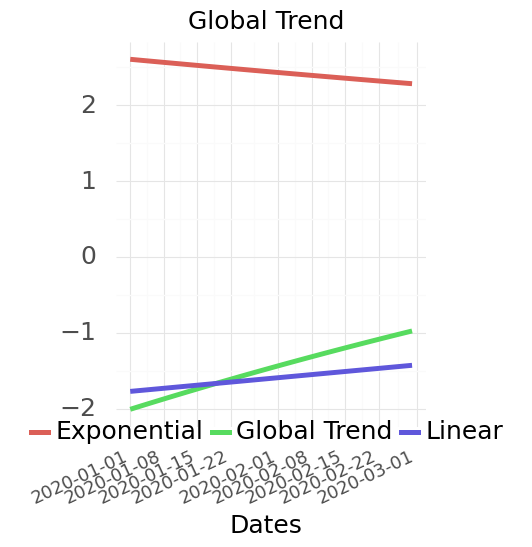

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/1bc1ca29-8e67-4d49-980f-c9382b96e904_global.png


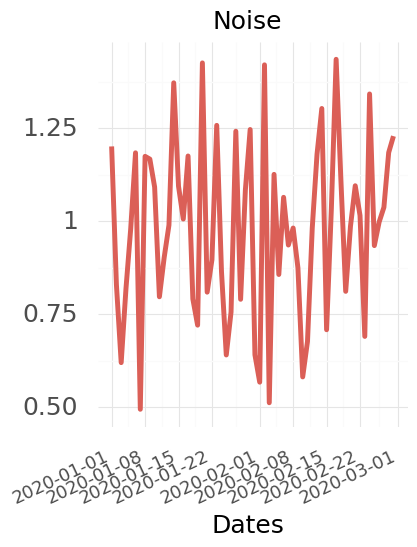

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/1bc1ca29-8e67-4d49-980f-c9382b96e904_noise.png


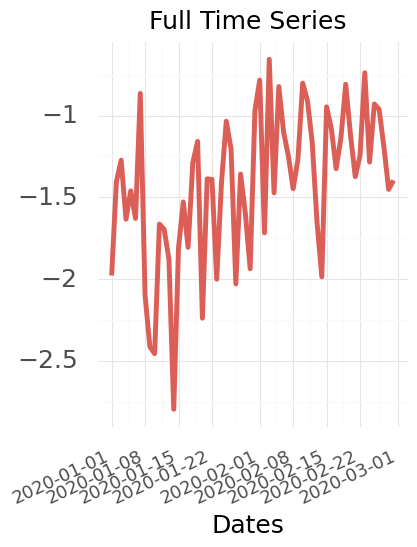

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/1bc1ca29-8e67-4d49-980f-c9382b96e904_full.png


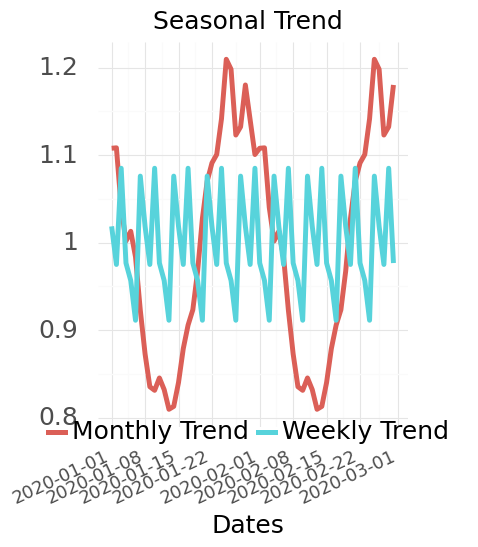

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/b173ec57-77cb-43ab-bcb8-737e1dc1460b_seasonal.png


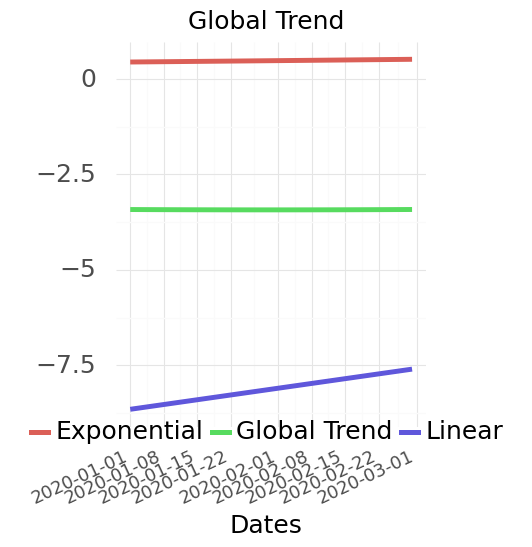

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/b173ec57-77cb-43ab-bcb8-737e1dc1460b_global.png


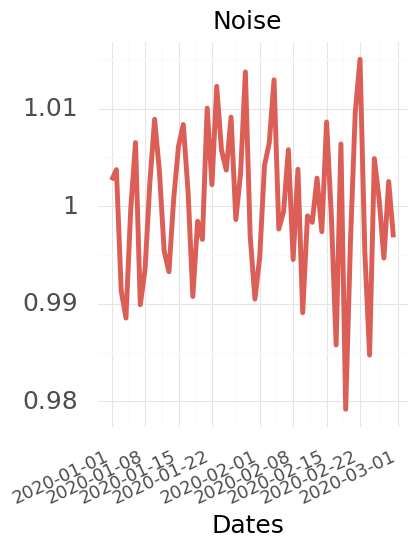

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/b173ec57-77cb-43ab-bcb8-737e1dc1460b_noise.png


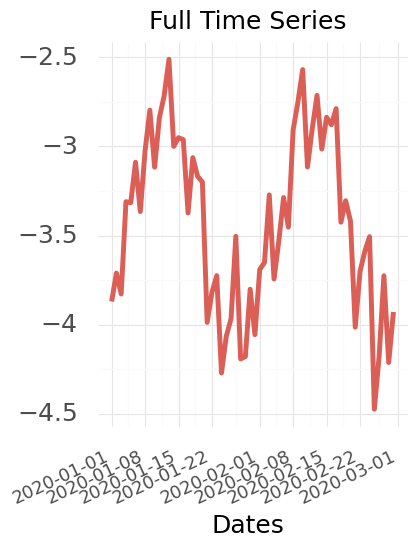

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/b173ec57-77cb-43ab-bcb8-737e1dc1460b_full.png


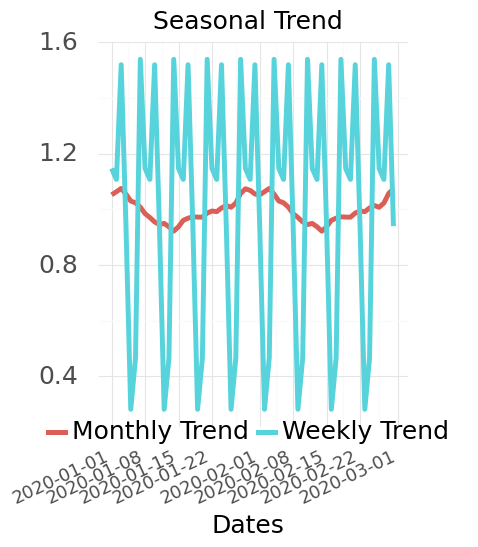

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/9cdcc632-42d0-47b4-a1be-c642196dbd56_seasonal.png


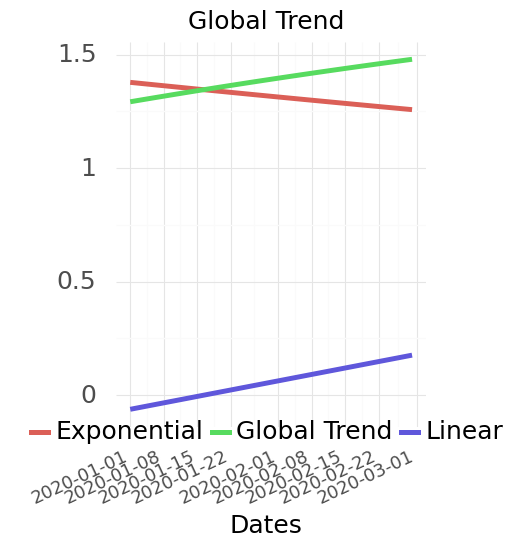

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/9cdcc632-42d0-47b4-a1be-c642196dbd56_global.png


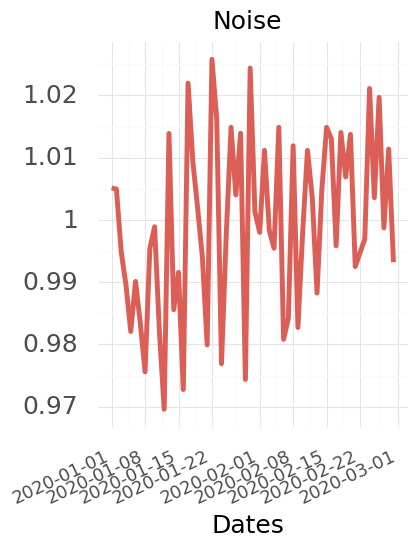

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/9cdcc632-42d0-47b4-a1be-c642196dbd56_noise.png


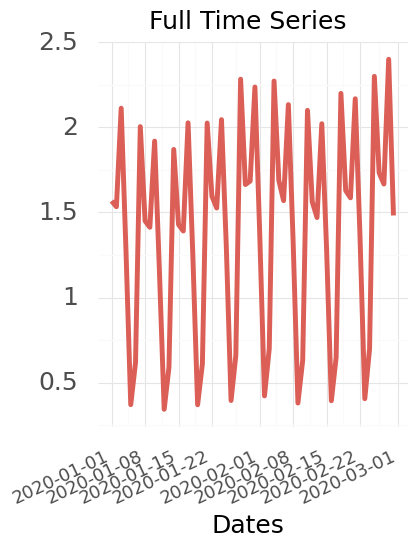

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/9cdcc632-42d0-47b4-a1be-c642196dbd56_full.png


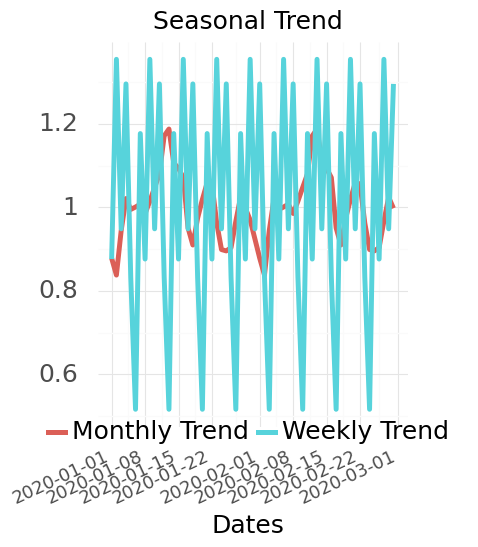

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/f9efe493-fde9-4a5f-8588-2ea0526574c0_seasonal.png


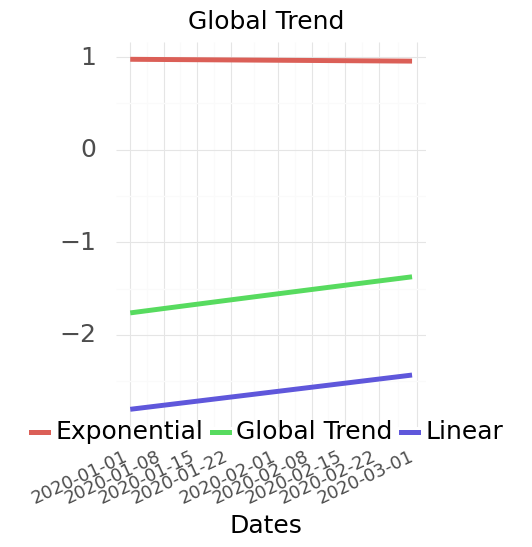

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/f9efe493-fde9-4a5f-8588-2ea0526574c0_global.png


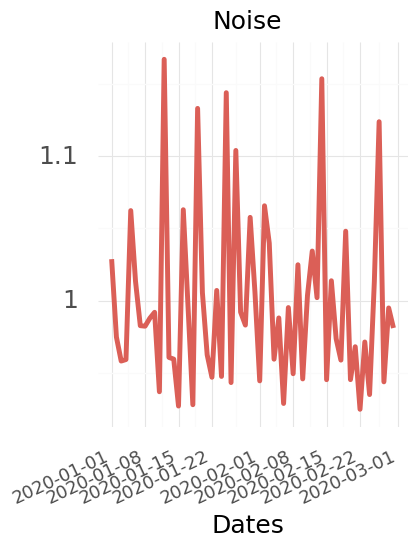

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/f9efe493-fde9-4a5f-8588-2ea0526574c0_noise.png


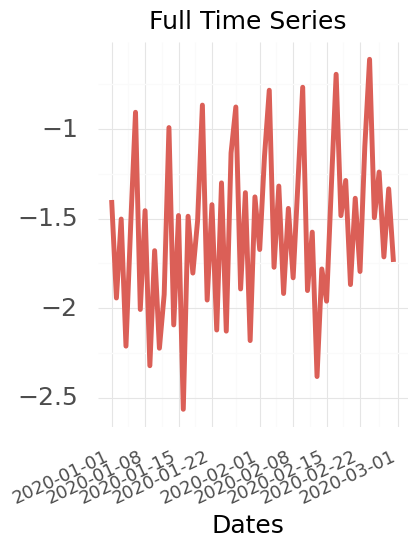

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/f9efe493-fde9-4a5f-8588-2ea0526574c0_full.png


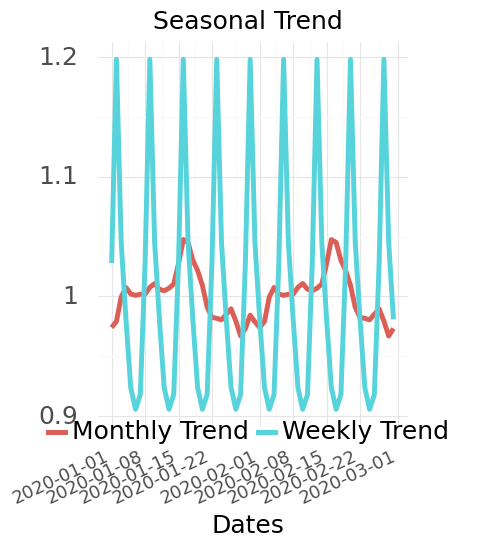

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/c64b7013-6647-4d4b-89c3-319c4c1d20cc_seasonal.png


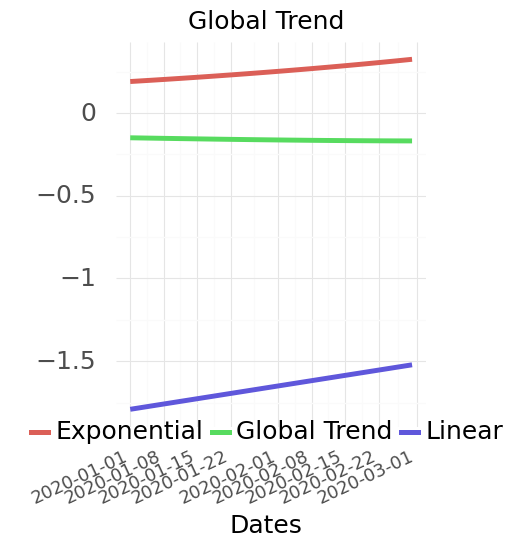

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/c64b7013-6647-4d4b-89c3-319c4c1d20cc_global.png


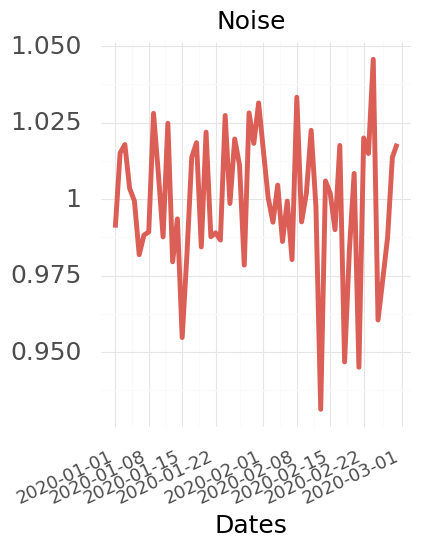

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/c64b7013-6647-4d4b-89c3-319c4c1d20cc_noise.png


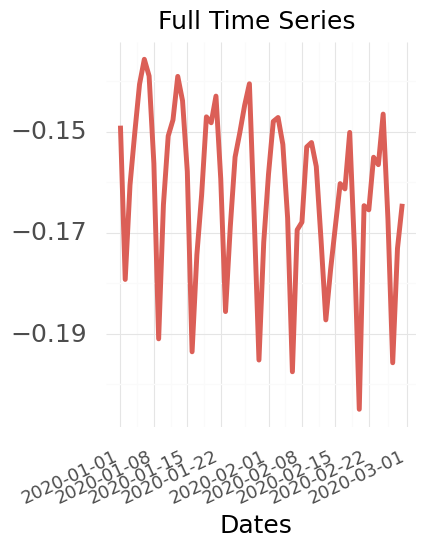

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/c64b7013-6647-4d4b-89c3-319c4c1d20cc_full.png


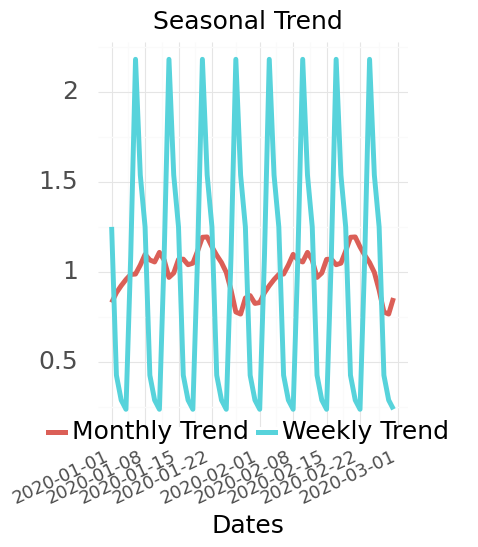

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/37b1966f-ea26-48af-b6f3-456c86d7ea67_seasonal.png


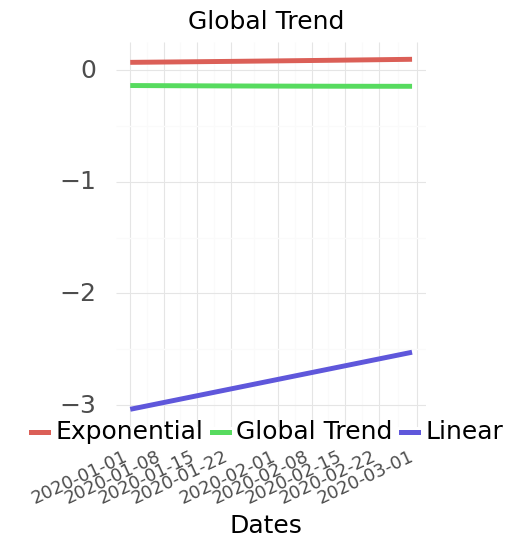

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/37b1966f-ea26-48af-b6f3-456c86d7ea67_global.png


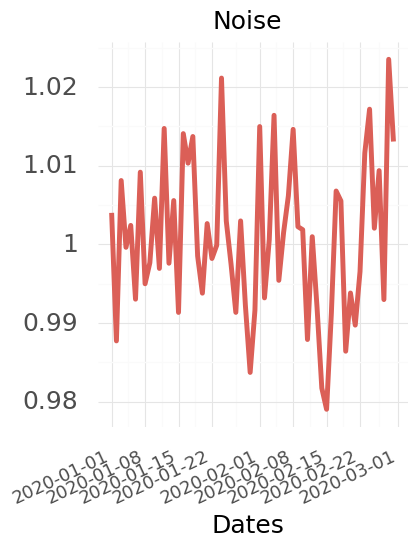

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/37b1966f-ea26-48af-b6f3-456c86d7ea67_noise.png


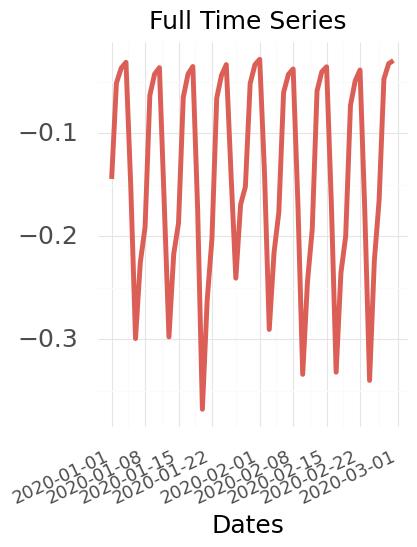

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/37b1966f-ea26-48af-b6f3-456c86d7ea67_full.png


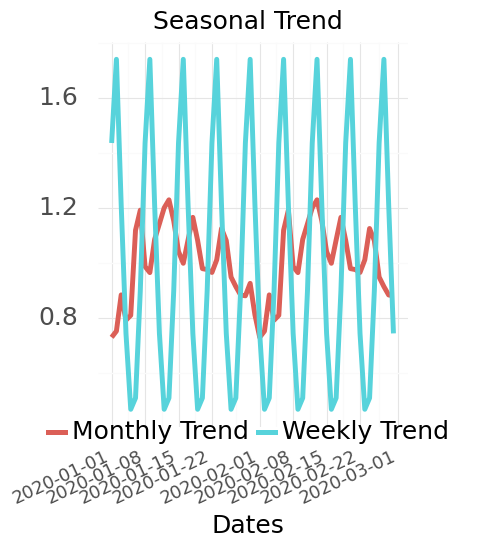

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/d756a32a-6809-405f-ad8e-269bed31da31_seasonal.png


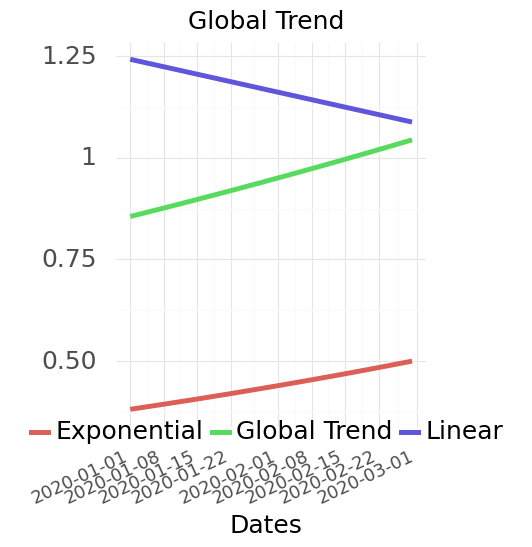

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/d756a32a-6809-405f-ad8e-269bed31da31_global.png


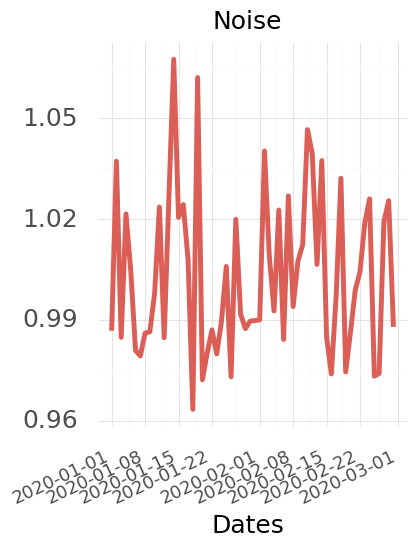

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/d756a32a-6809-405f-ad8e-269bed31da31_noise.png


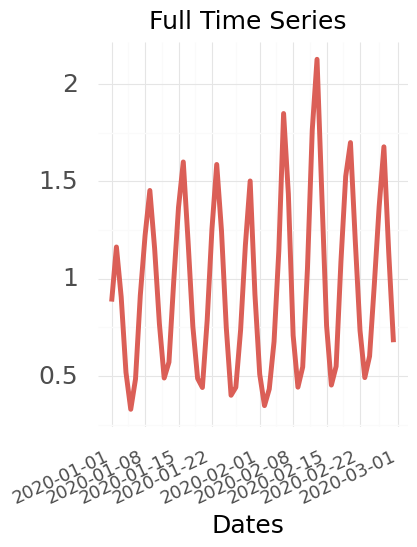

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/d756a32a-6809-405f-ad8e-269bed31da31_full.png


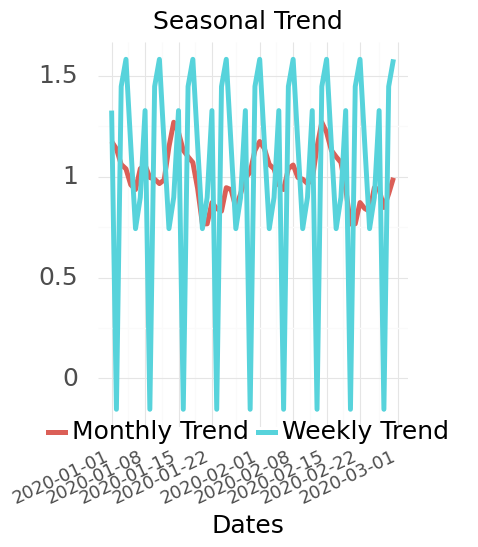

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/bac22968-3de3-49ad-b6c2-b8adf8fe27d1_seasonal.png


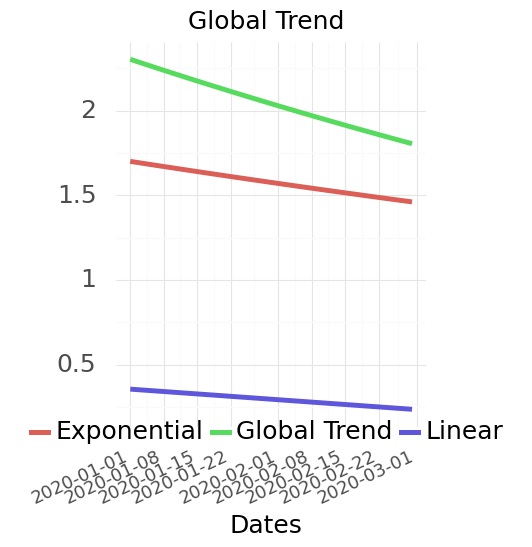

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/bac22968-3de3-49ad-b6c2-b8adf8fe27d1_global.png


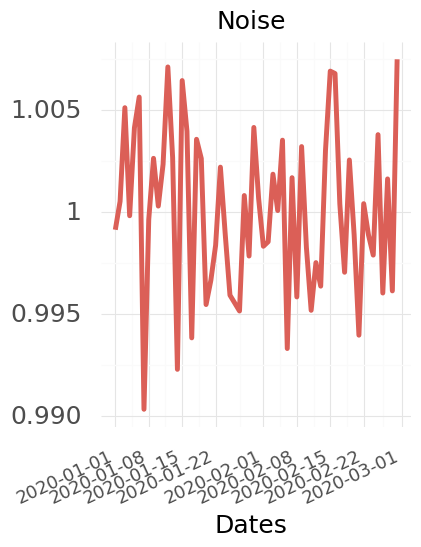

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/bac22968-3de3-49ad-b6c2-b8adf8fe27d1_noise.png


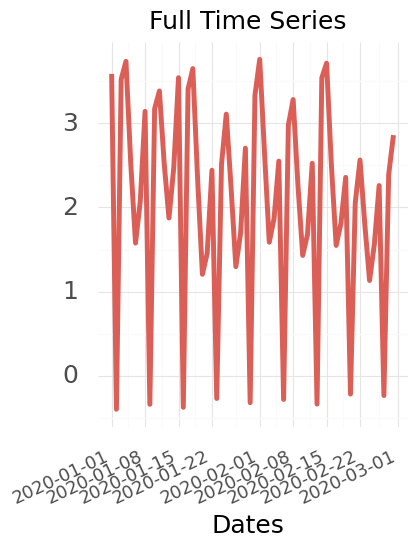

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/bac22968-3de3-49ad-b6c2-b8adf8fe27d1_full.png


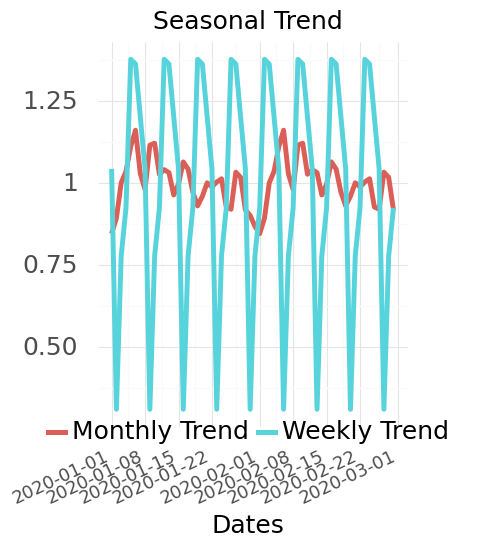

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/99f11768-5cd7-4ce6-834f-adc5213566ea_seasonal.png


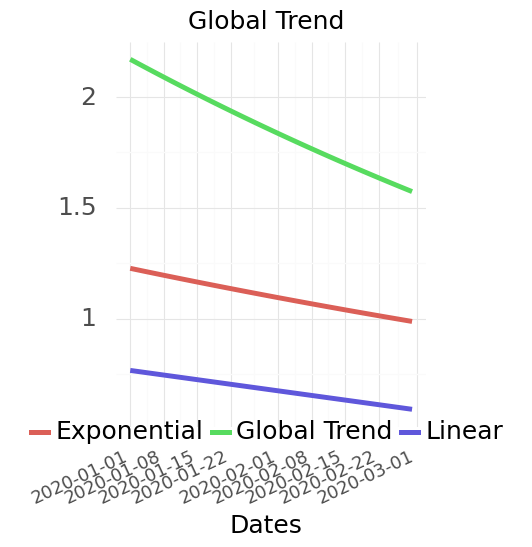

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/99f11768-5cd7-4ce6-834f-adc5213566ea_global.png


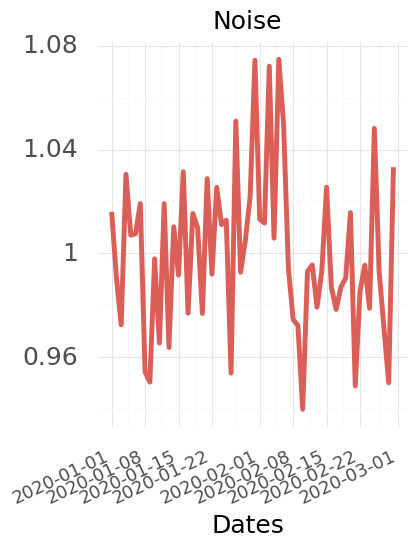

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/99f11768-5cd7-4ce6-834f-adc5213566ea_noise.png


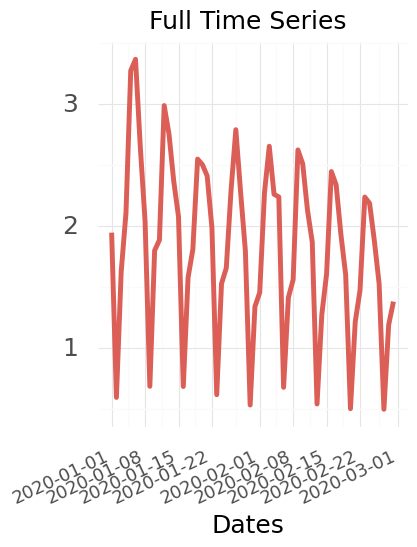

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/99f11768-5cd7-4ce6-834f-adc5213566ea_full.png


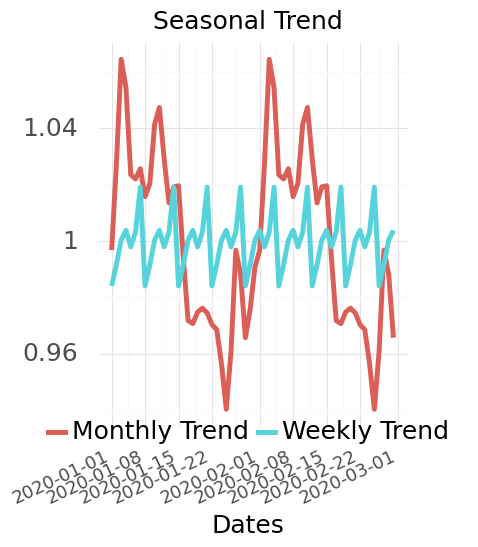

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/e6c0cb1b-a245-40d5-bc8f-388b55c53507_seasonal.png


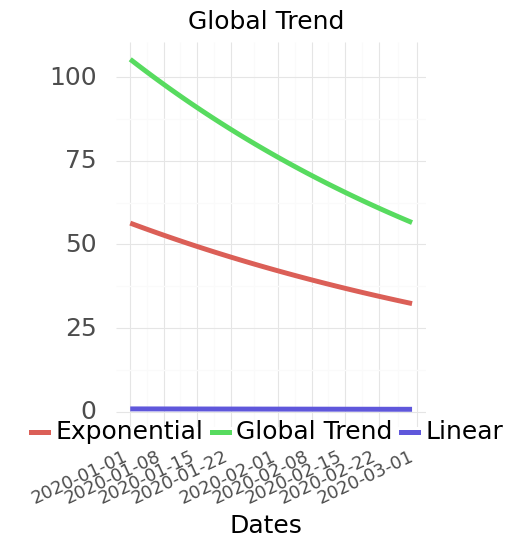

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/e6c0cb1b-a245-40d5-bc8f-388b55c53507_global.png


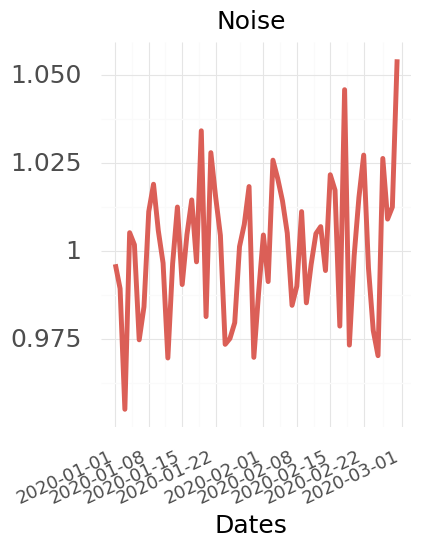

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/e6c0cb1b-a245-40d5-bc8f-388b55c53507_noise.png


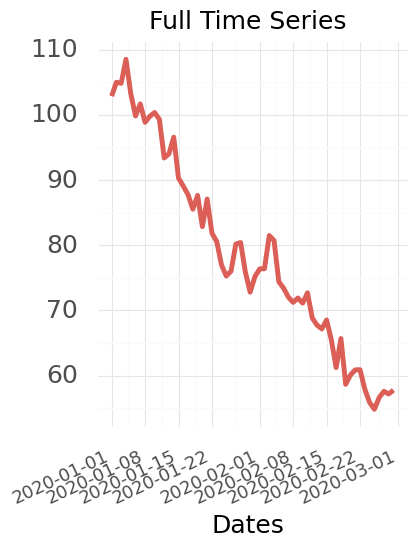

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/e6c0cb1b-a245-40d5-bc8f-388b55c53507_full.png


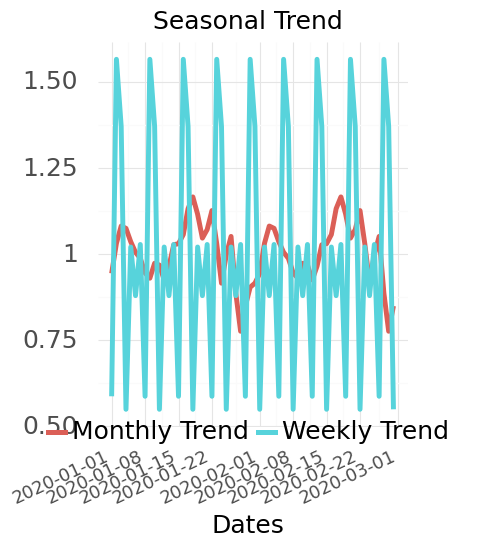

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/93add31c-a134-4e3e-955b-c5ea4a998f38_seasonal.png


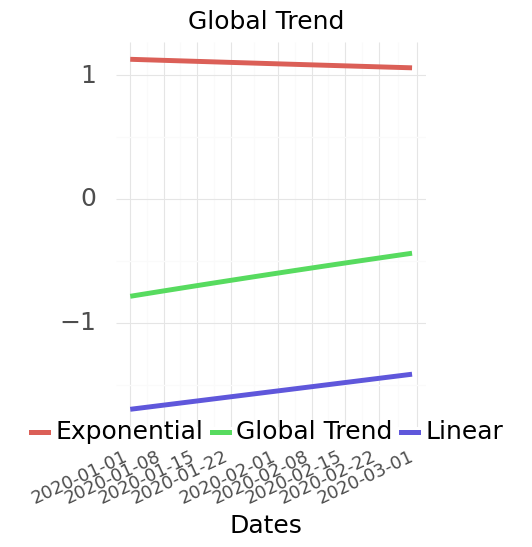

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/93add31c-a134-4e3e-955b-c5ea4a998f38_global.png


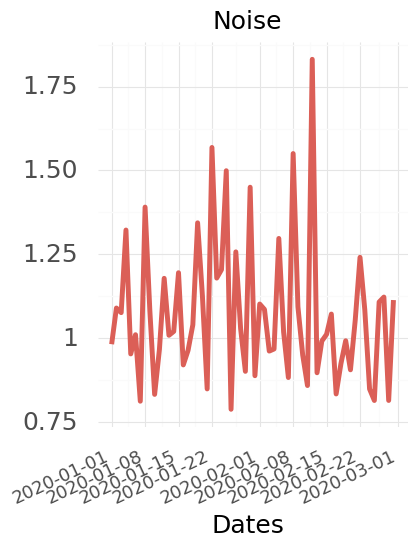

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/93add31c-a134-4e3e-955b-c5ea4a998f38_noise.png


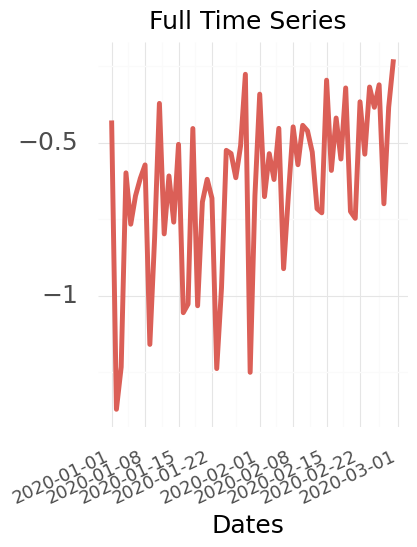

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/93add31c-a134-4e3e-955b-c5ea4a998f38_full.png


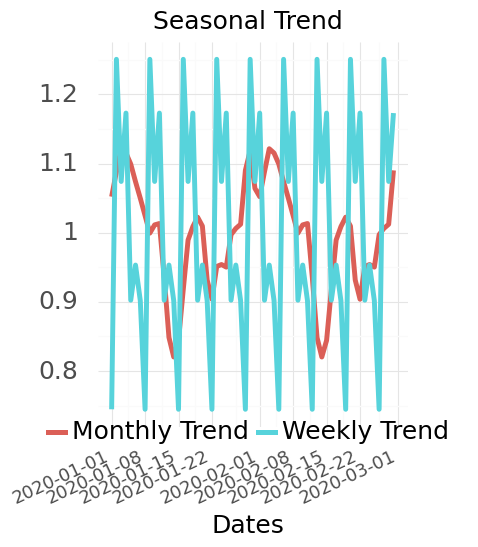

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/ea833c71-78ed-46cc-9773-06b7f284264a_seasonal.png


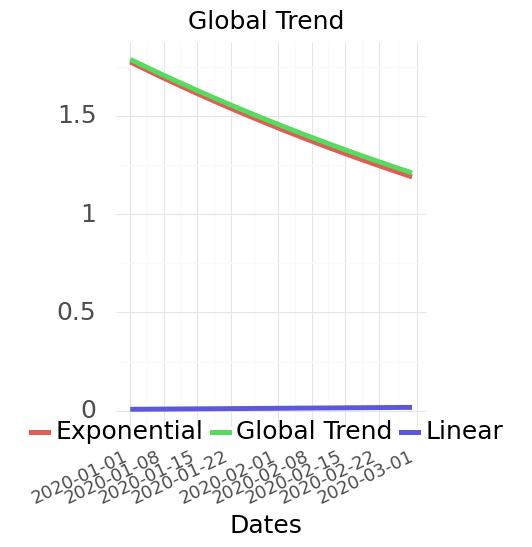

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/ea833c71-78ed-46cc-9773-06b7f284264a_global.png


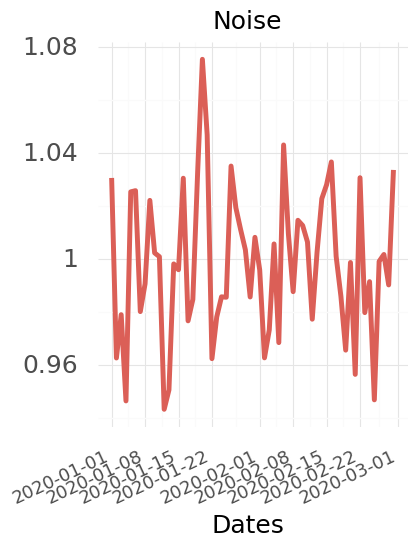

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/ea833c71-78ed-46cc-9773-06b7f284264a_noise.png


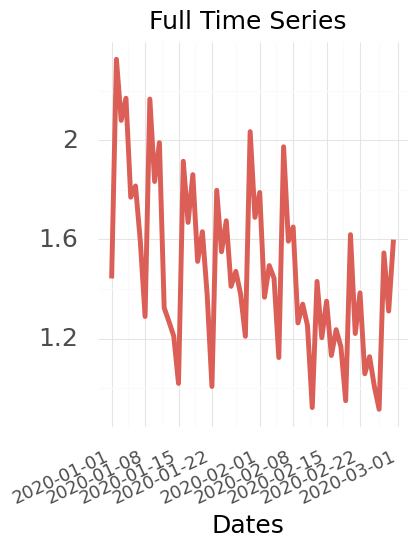

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/ea833c71-78ed-46cc-9773-06b7f284264a_full.png


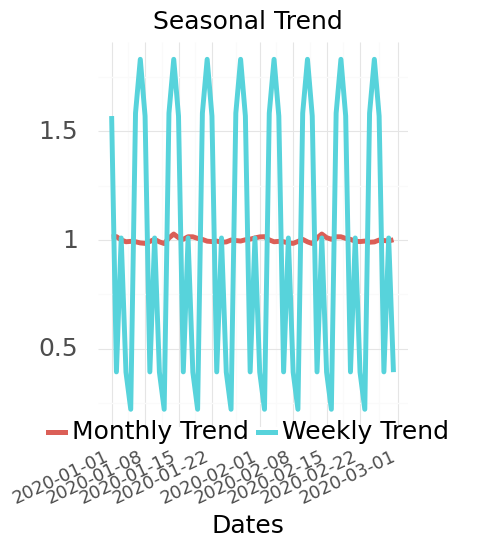

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/b34fc3b3-0212-4649-b76f-ef05a06fcff1_seasonal.png


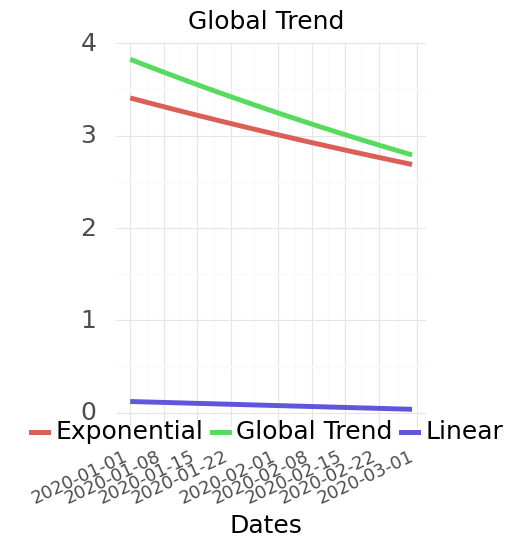

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/b34fc3b3-0212-4649-b76f-ef05a06fcff1_global.png


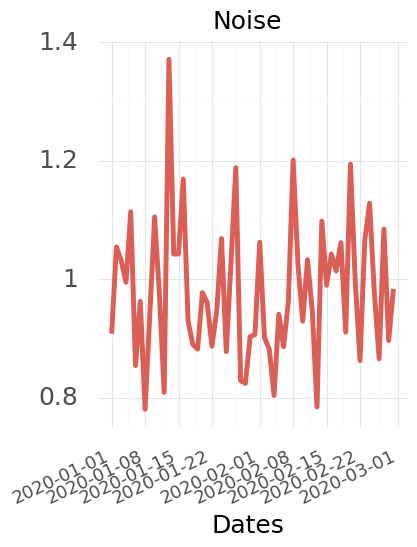

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/b34fc3b3-0212-4649-b76f-ef05a06fcff1_noise.png


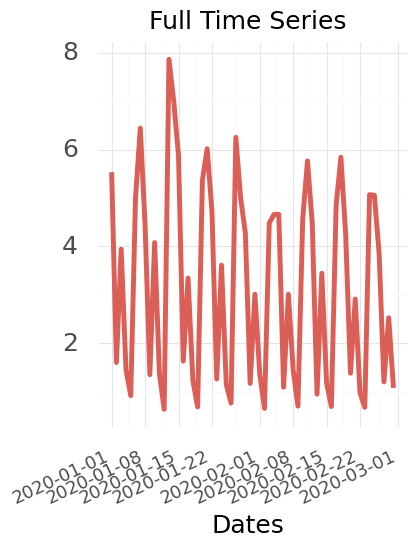

/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5 in image.
/home/ubuntu/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../academic_comparison/figures/example_series/b34fc3b3-0212-4649-b76f-ef05a06fcff1_full.png


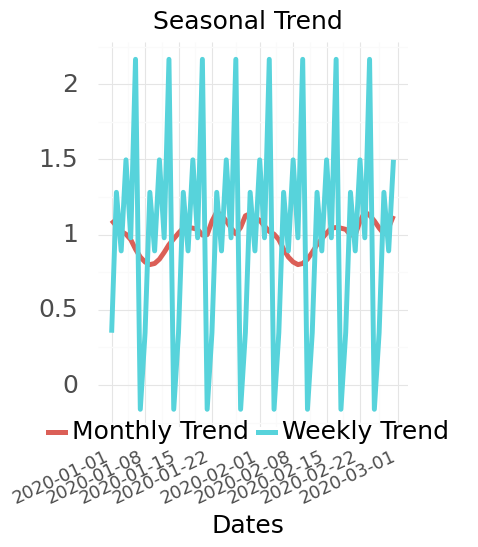

In [33]:
import pandas as pd
import uuid
freq, freq_index, timescale = "D", 0, 1 # daily
# freq, freq_index, timescale = "W", 1, 7 # weekly

num_series = 100
start=pd.Timestamp("2020-01-01")
PLOT_LEN = 60

for _ in range(num_series):
    # annual, monthly, weekly, hourly and minutely components
    a, m, w, h, minute = 0.0, 0.0, 0.0, 0.0, 0.0
    if freq == "D":
        w = np.random.uniform(0.0, 1.0)
        m = np.random.uniform(0.0, 0.2)
    elif freq == "W":
        m = np.random.uniform(0.0, 0.3)
        a = np.random.uniform(0.0, 0.3)
    elif freq == "MS":
        w = np.random.uniform(0.0, 0.1)
        a = np.random.uniform(0.0, 0.5)
    elif freq == "Y":
        w = np.random.uniform(0.0, 0.2)
        a = np.random.uniform(0.0, 1)
    else:
        raise NotImplementedError

    scale_config = ComponentScale(
        1.0,
        np.random.normal(0, 0.01),
        np.random.normal(1, 0.005 / timescale),
        a=a,
        m=m,
        w=w,
        minute=minute,
        h=h
    )

    offset_config = ComponentScale(
        0,
        np.random.uniform(-0.1, 0.5),
        np.random.uniform(-0.1, 0.5),
        a=np.random.uniform(0.0, 1.0),
        m=np.random.uniform(0.0, 1.0),
        w=np.random.uniform(0.0, 1.0),
    )

    noise_config = ComponentNoise(
        k=np.random.uniform(1, 5),
        median=1,
        scale=sample_scale()
    )

    cfg = SeriesConfig(scale_config, offset_config, noise_config)
    values_trend, values_linear, values_exp, values_seasonal, noise, dates, values = make_series(cfg, to_offset(freq), CONTEXT_LENGTH, start)

    noisy_values = noise * values


    seasonal_trend = pd.DataFrame({'Dates': dates,
                                'Weekly Trend': values_seasonal['w'],
                                'Monthly Trend': values_seasonal['m'],
                                })[:PLOT_LEN]

    global_trend = pd.DataFrame({'Dates': dates,
                                'Linear': values_linear,
                                'Exponential': values_exp,
                                'Global Trend': values_trend,
                                })[:PLOT_LEN]

    noise_df = pd.DataFrame({'Dates': dates, 'Noise': noise})[:PLOT_LEN]
    full = pd.DataFrame({'Dates': dates, 'Full Time Series': noisy_values})[:PLOT_LEN]    
    
    name = uuid.uuid4()

    p_seasonal = (ggplot(seasonal_trend.melt('Dates'))
                + aes(x='Dates', y='value', color='variable')
                + geom_line(size=2)
                + series_theme
                + labs(title=f'Seasonal Trend')
                + ylab(f'')
                #      + theme(figure_size=(15, 5))
                )
    print(p_seasonal)
    p_seasonal.save(
        f'../../academic_comparison/figures/example_series/{name}_seasonal.png')

    p_global = (ggplot(global_trend.melt('Dates'))
                + aes(x='Dates', y='value', color='variable')
                + geom_line(size=2)
                + series_theme
                + labs(title=f'Global Trend')
                + ylab(f'')
                # + guides(color=guide_legend(nrow=2))
                #      + theme(figure_size=(15, 5))
                )
    print(p_global)
    p_global.save(
        f'../../academic_comparison/figures/example_series/{name}_global.png')

    p_noise = (ggplot(noise_df.melt('Dates'))
            + aes(x='Dates', y='value', color='variable')
            + geom_line(size=2)
            + series_theme
            + labs(title=f'Noise')
            + ylab(f'')
            #      + theme(figure_size=(15, 5))
            + theme(
            legend_position="none",
    )
    )
    print(p_noise)
    p_noise.save(
        f'../../academic_comparison/figures/example_series/{name}_noise.png')

    p_full = (ggplot(full.melt('Dates'))
            + aes(x='Dates', y='value', color='variable')
            + geom_line(size=2)
            + series_theme
            + labs(title=f'Full Time Series')
            + ylab(f'')
            #      + theme(figure_size=(15, 5))
            + theme(
        legend_position="none",
    )
    )
    print(p_full)
    p_full.save(
        f'../../academic_comparison/figures/example_series/{name}_full.png')
